<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter2ForwardModels/DiscreteForwardModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging
### David J. Brady
### University of Arizona

## Discrete Forward Models

This notebook supports ideas developed in section 2.6 of *Computational Optical Imaging*. Specifically we consider the structure of discrete forward models for continuous signals.

#### initialization code

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy import integrate
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
#plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})
from google.colab import files
#!apt install texlive-fonts-recommended texlive-fonts-extra



## Sampling functions

We plot the transfer function for the pixel sampling functions
$$ p_0(x)={\rm rect} \left (\frac{x}{\Delta} \right )$$
$$ p_1(x)={\rm rect} \left (\frac{3(x-\frac{2\Delta}{3})}{\Delta} \right )+{\rm rect} \left (\frac{3x}{\Delta} \right )+{\rm rect} \left (\frac{3(x+\frac{2\Delta}{3})}{\Delta} \right )$$
$$ p_2(x)=e^{-\pi\left (\frac{x}{\Delta}\right )^2}$$

The corresponding transfer functions are
$$ {\hat p}_0(u)={\rm sinc}(\Delta u)$$
$$ {\hat p}_1(u)=\left ( 1+2\cos \left (4\pi \frac{u}{3\Delta }\right )\right ){\rm sinc}(\frac{\Delta}{3} u )$$
$${\hat p}_2(u)=e^{-\pi \Delta^2u^2}$$

In [10]:
def rect(x):
  b=(1.-np.sign(np.abs(x)-.5))/2.
  return b

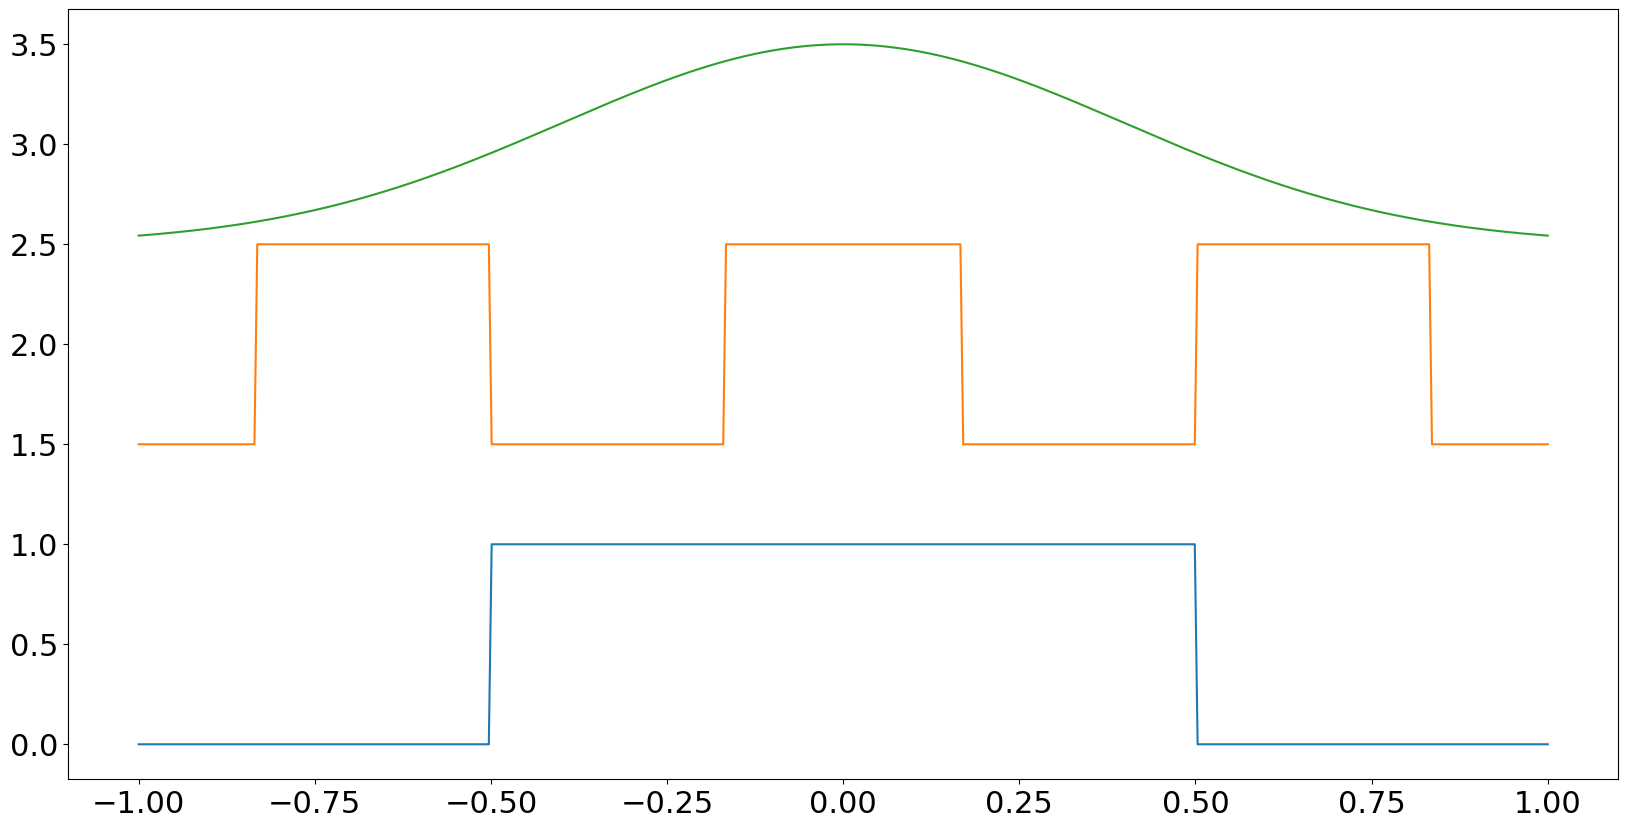

In [20]:
x=np.linspace(-1,1,500)
plt.plot(x,rect(x))
plt.plot(x,rect(3*(x-2/3.))+rect(3*x)+rect(3*(x+2/3.))+1.5)
plt.plot(x,np.exp(-np.pi*x**2 )+2.5)

## Effect of sampling and interpolation

Consider $f(x)\in V_B$. For example, we might consider
$$f(x)=\cos (\frac{2\pi }x) e^{-\frac{ x^2}{10} }
$$
as illustrated below. the greatest spatial frequency if $f(x)$ is approximately $1$,  so as long as the sampling period is $>1/2$ the aliasing should not occur.



### 5x over sampling

sampling rate .1, 5 times Nyquist

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

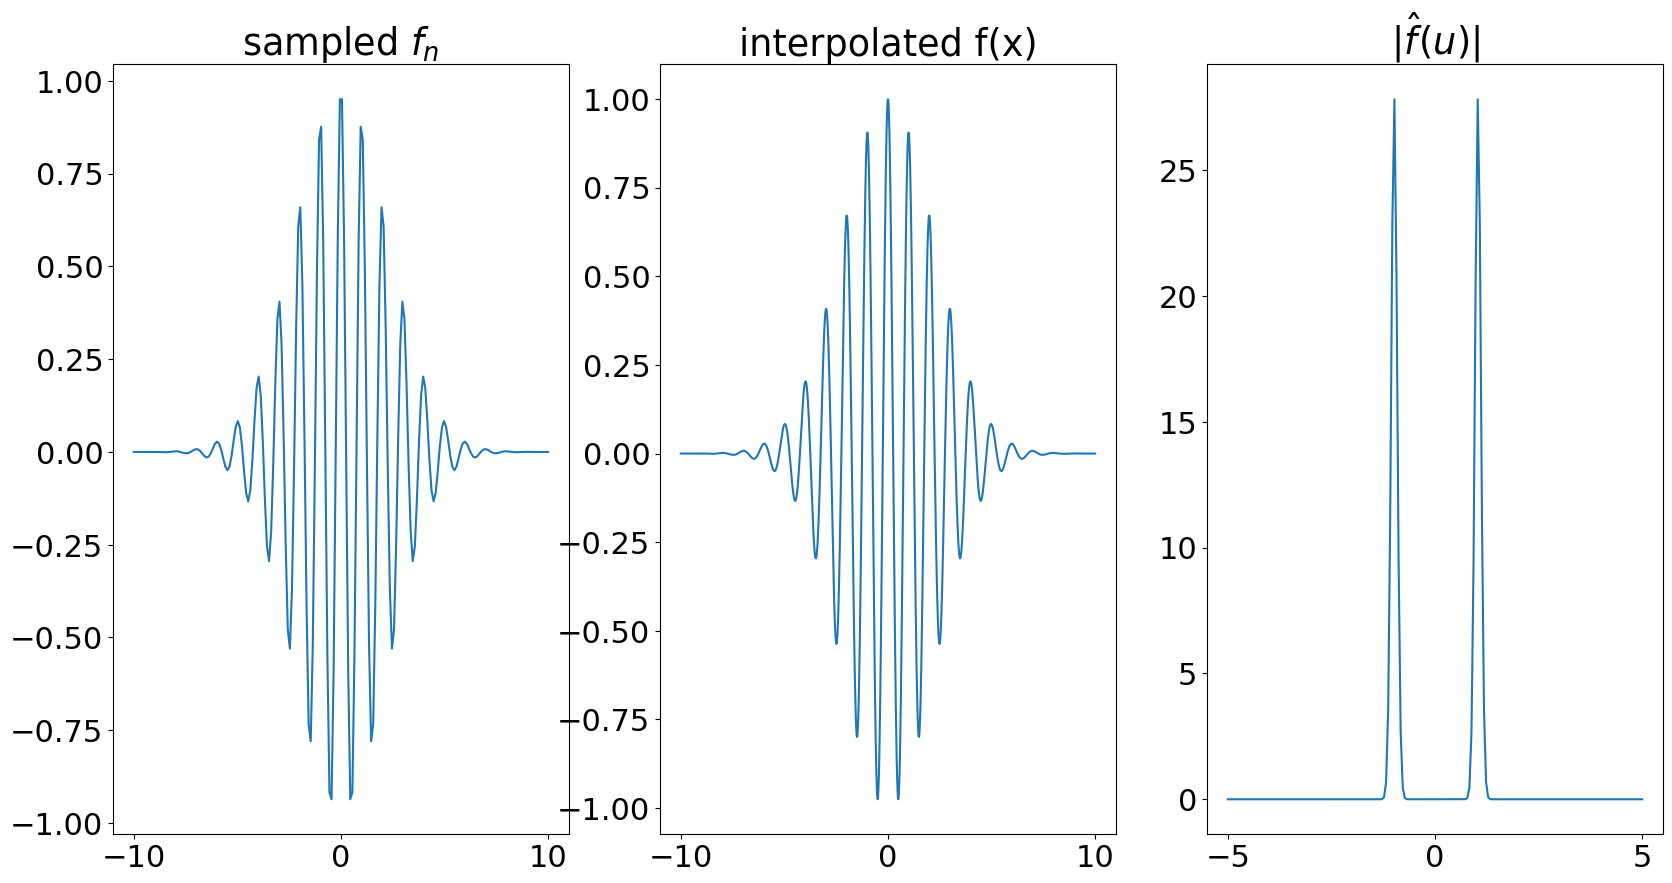

In [ ]:
X=10
samplingRate=.1
N=int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*np.exp(-x**2/10)
  return f
# now let's make interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos5XNyquist.png')
files.download('cos5XNyquist.png')

### 1.5x over sampling

sampling rate 1/3, 3/2 times Nyquist

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

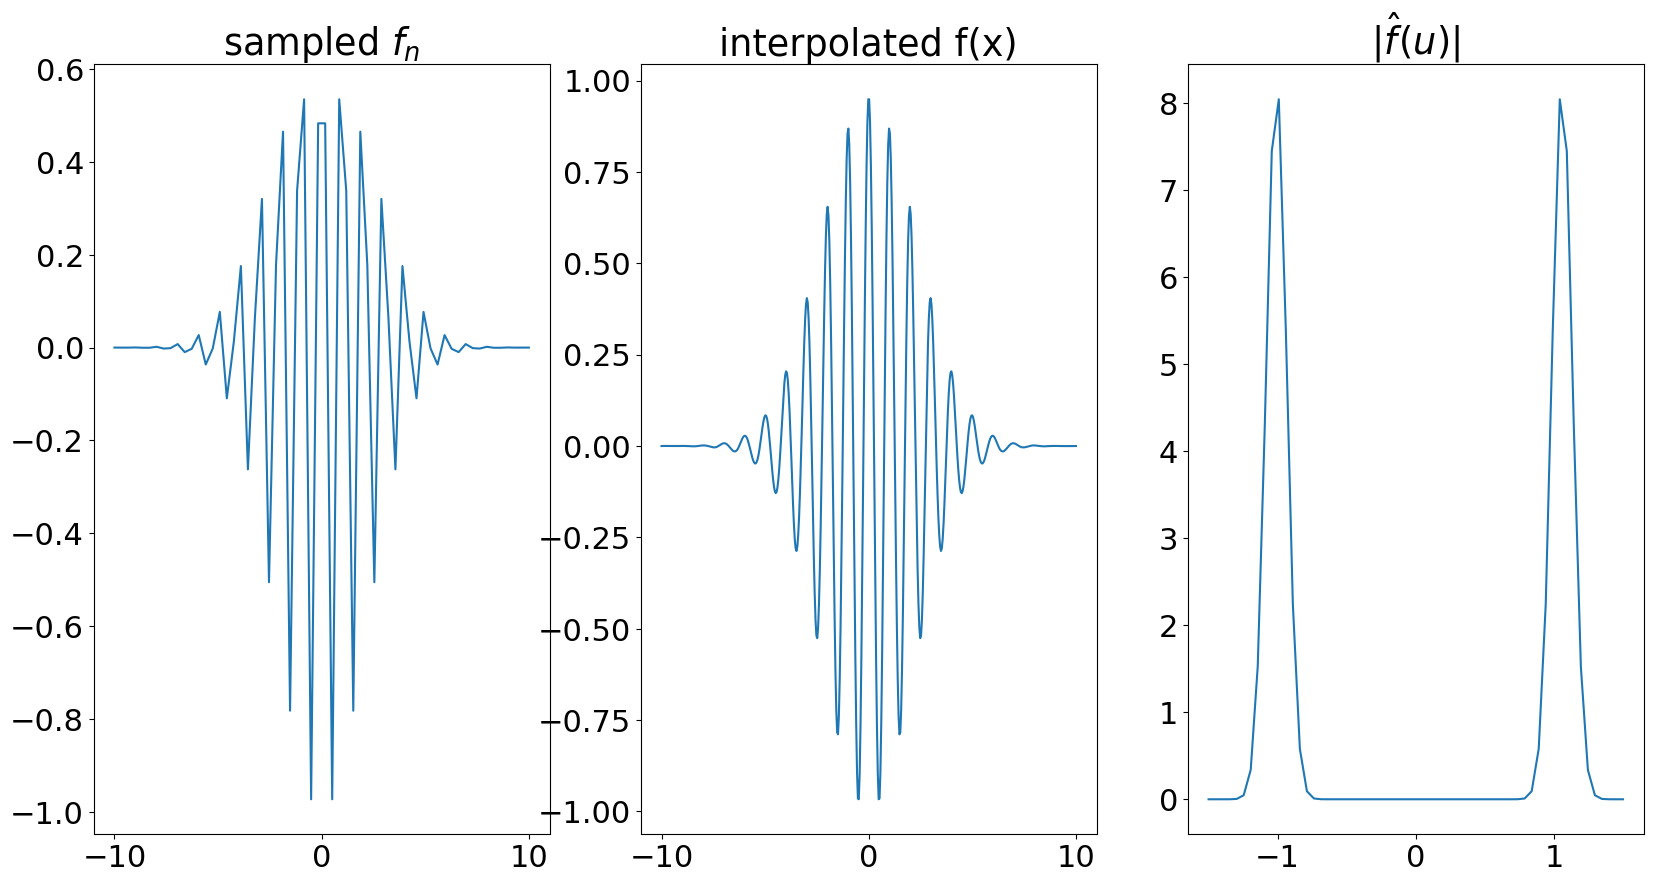

In [ ]:
X=10
samplingRate=1/3.
N=int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*np.exp(-x**2/10)
  return f
# now let's make interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos1p5XNyquist.png')
files.download('cos1p5XNyquist.png')

### 1.1x over sampling

sampling rate .5/1.1, 1.1 times Nyquist

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

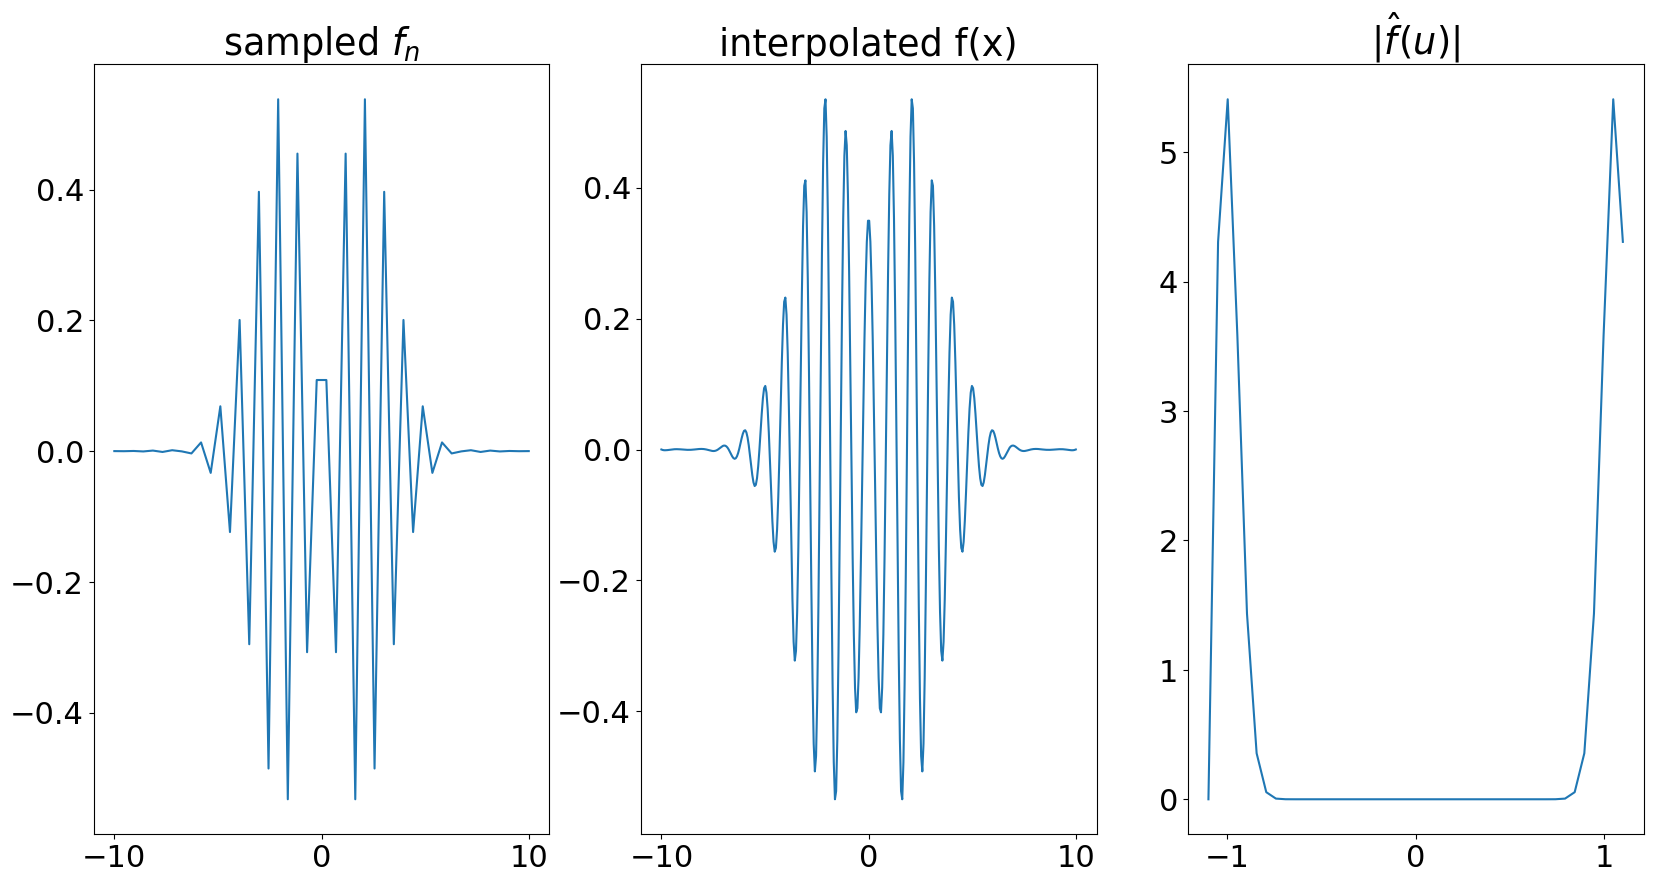

In [ ]:
X=10
samplingRate=.5/1.1
N=int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*np.exp(-x**2/10)
  return f
# now let's make interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos1p1XNyquist.png')
files.download('cos1p1XNyquist.png')

### 1.3x under sampling

sampling rate .5$\times$1.3, 1.1 times Nyquist

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

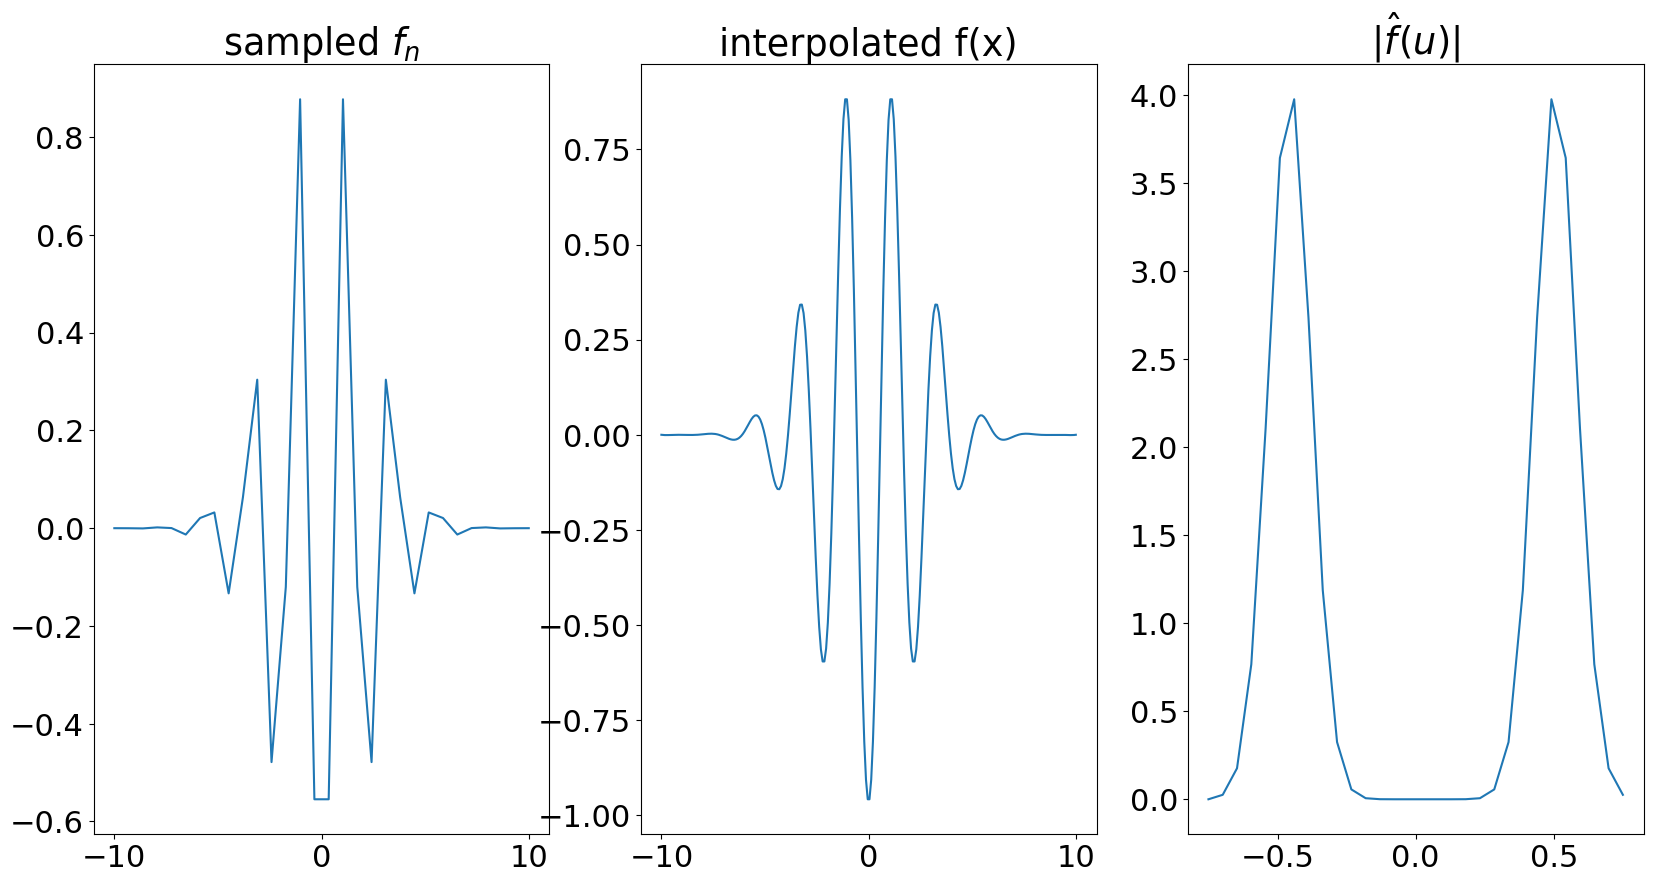

In [ ]:
X=10
samplingRate=.5*1.3
N=int(2*X/samplingRate)
B=N/(4*X)
xrange=np.linspace(-X,X,N)
urange=np.linspace(-B,B,N)
def f(x):
  f=np.cos(2*np.pi*x)*np.exp(-x**2/10)
  return f
# now let's make interpolated function
fUp= InterpolatedUnivariateSpline(xrange,f(xrange), k=5)
plt.subplot(1,3,1)
plt.plot(xrange,f(xrange))
plt.title('sampled $f_n$')
plt.subplot(1,3,2)
xUpSample=np.linspace(-X,X,8*N)
plt.plot(xUpSample,fUp(xUpSample))
plt.title('interpolated f(x)')
plt.subplot(1,3,3)
plt.plot(urange,np.abs(np.fft.fftshift(np.fft.fft(f(xrange)))))
plt.title('$|{\hat f}(u)|$')
plt.savefig('cos1p3uNyquist.png')
files.download('cos1p3uNyquist.png')

## Effect of finite pixel size

We measure discrete samples of $g(x)=\int f(x')h(x-x') dx$. For $h(x)={\rm rect}\left (\frac{x}{\Delta}\right )$ we can find $g_i$ using the Harr sampling strategy shown in Chapter2ForwardModels/wavelets.ipynb

In [ ]:
X=10
def f(x):
  f=np.cos(2*np.pi*(x**2/2))*np.exp(-x**2/10)
  return f
def gn(delta=1):
  N=int(2*X/delta)
  gg=np.zeros(N)
  for pop in np.arange(len(gg)):
    gg[pop]=integrate.quad(f,(-X+pop*delta),(-X+(pop+1)*delta))[0]
  return gg


### Sampling periods

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

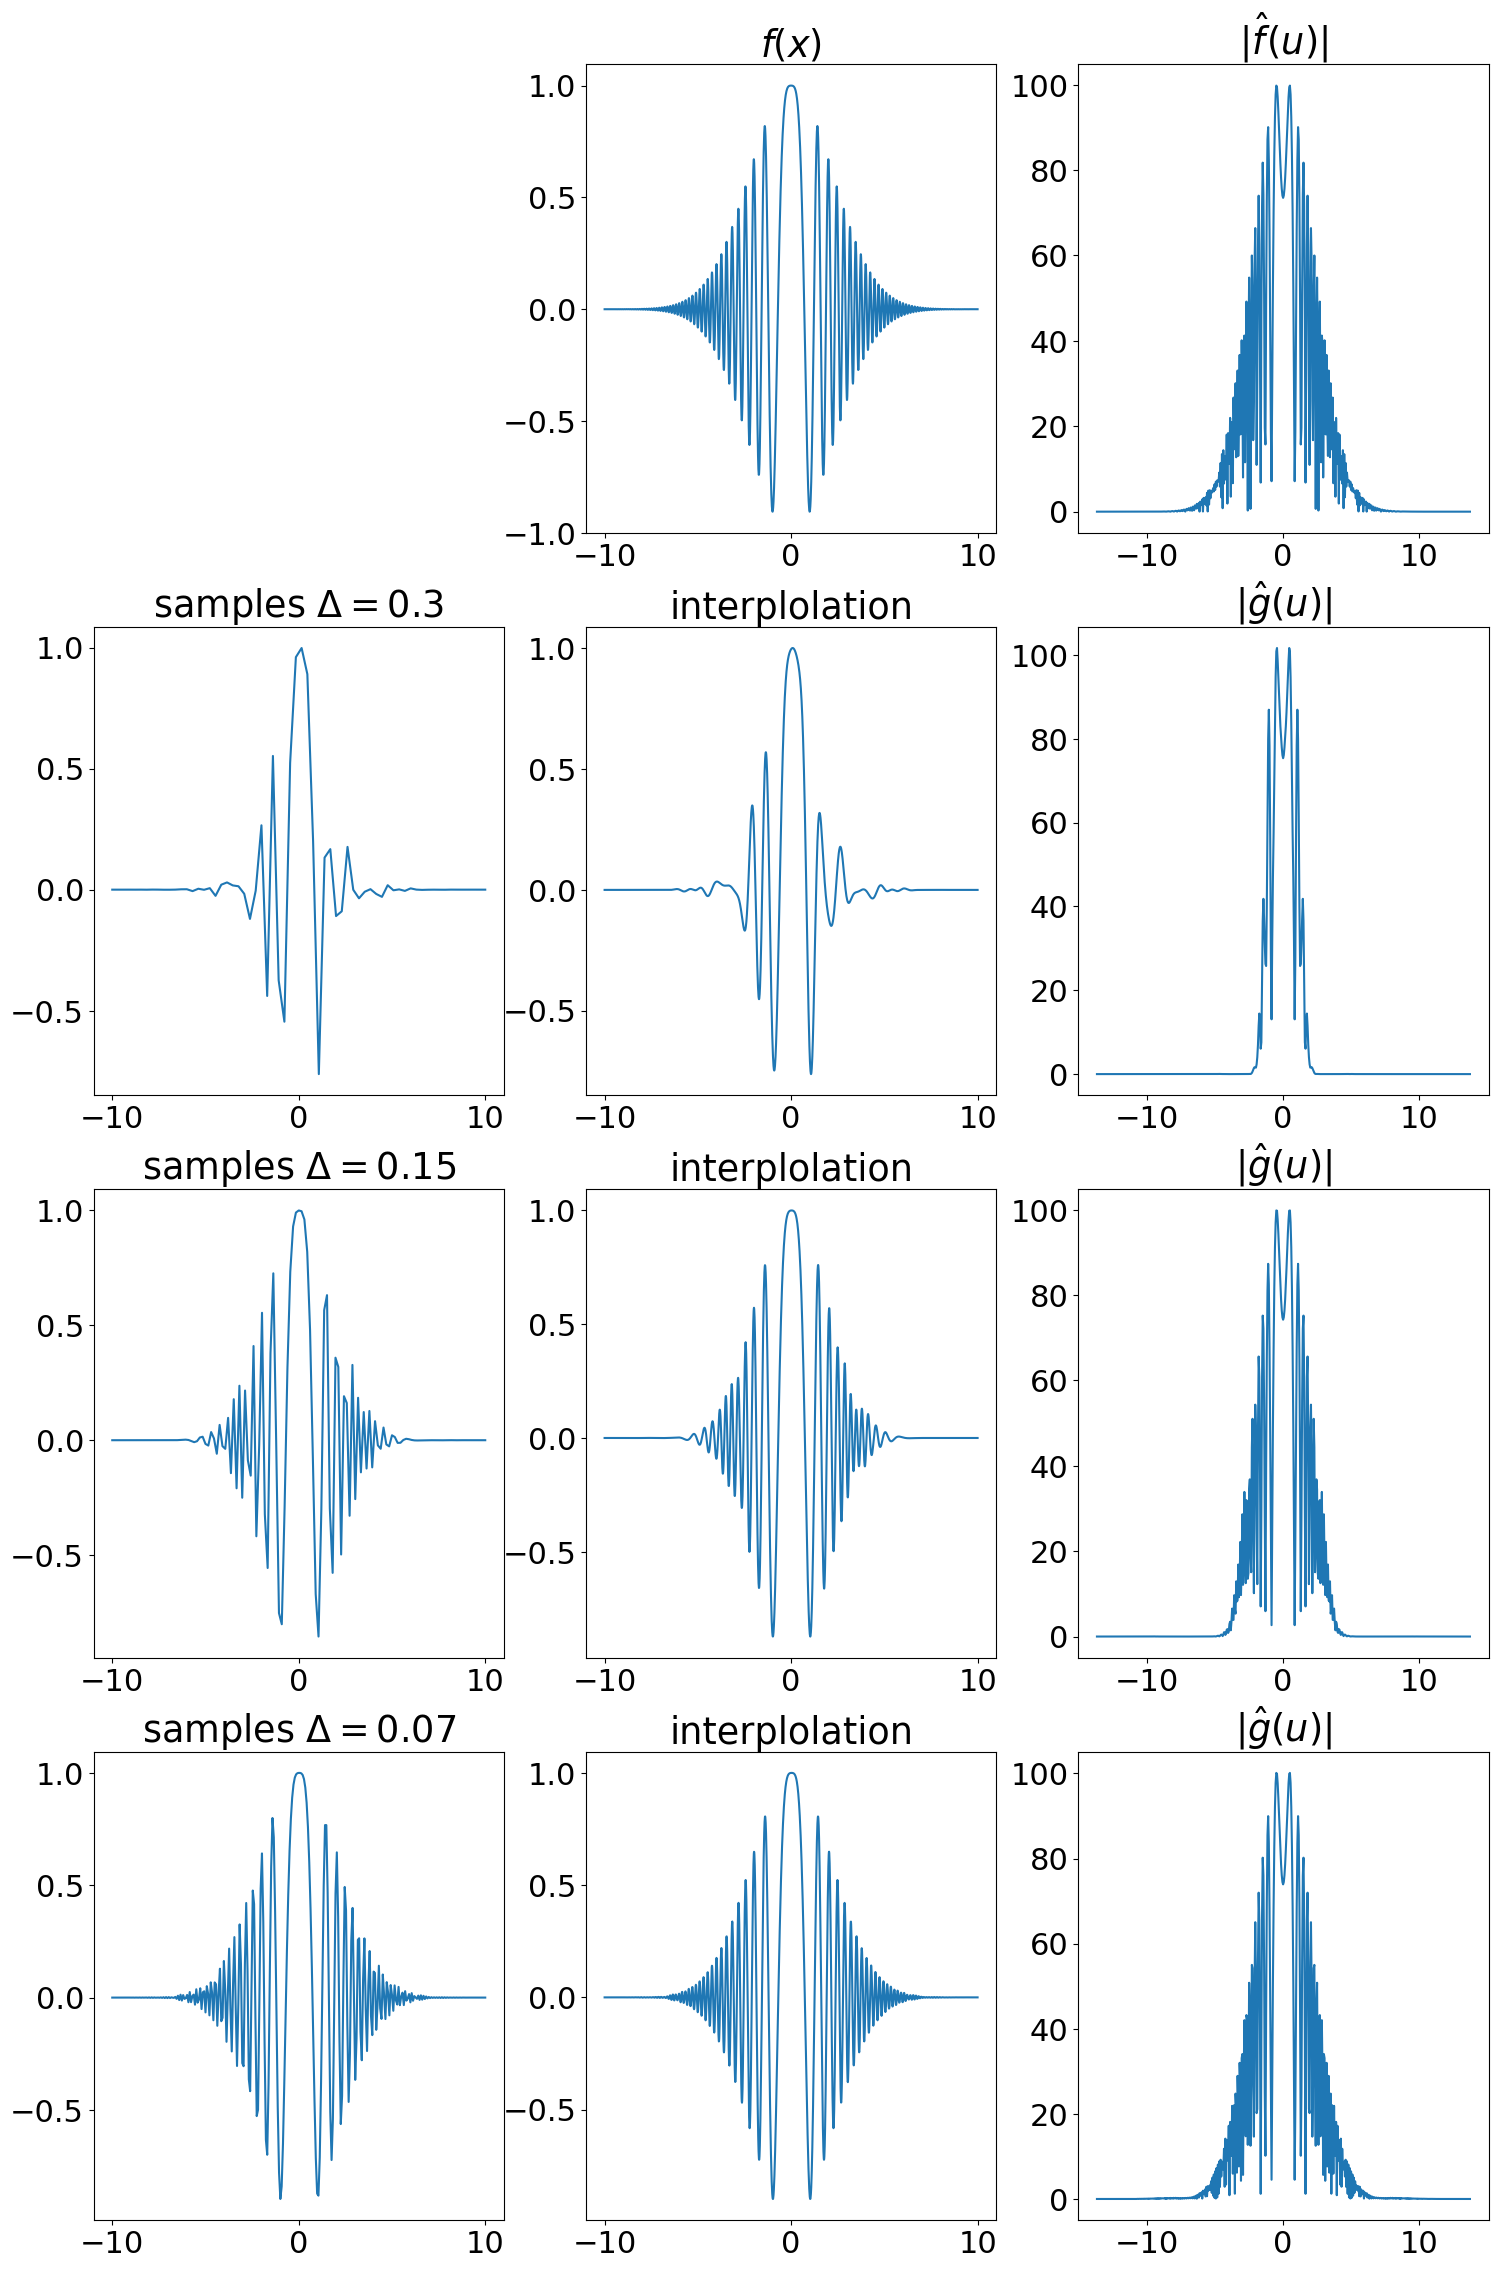

In [ ]:
plt.rcParams['figure.figsize'] = [18, 28]
X=10
xrange=np.linspace(-X,X,2048)
urange=np.linspace(-2048/(4*X),2048/(4*X),2048)
plt.subplot(4,3,2)
plt.plot(xrange,f(xrange))
plt.title('$f(x)$')
plt.subplot(4,3,3)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(f(xrange))))[750:1300])
plt.title('$|{\hat f}(u)|$')
plt.subplot(4,3,4)
gN=gn(.3)/.3
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('samples $\Delta=0.3$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,5)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation')
plt.subplot(4,3,6)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,7)
gN=gn(.15)/.15
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('samples $\Delta=0.15$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,8)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation')
plt.subplot(4,3,9)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.subplot(4,3,10)
gN=gn(.07)/.07
plt.plot(np.linspace(-X,X,len(gN)),gN)
plt.title('samples $\Delta=0.07$')
gUp= InterpolatedUnivariateSpline(np.linspace(-X,X,len(gN)),gN, k=5)
plt.subplot(4,3,11)
plt.plot(xrange,gUp(xrange))
plt.title('interplolation')
plt.subplot(4,3,12)
plt.plot(urange[750:1300],np.abs(np.fft.fftshift(np.fft.fft(gUp(xrange))))[750:1300])
plt.title('$|{\hat g}(u)|$')
plt.savefig('sampleFiltering.png')
files.download('sampleFiltering.png')


